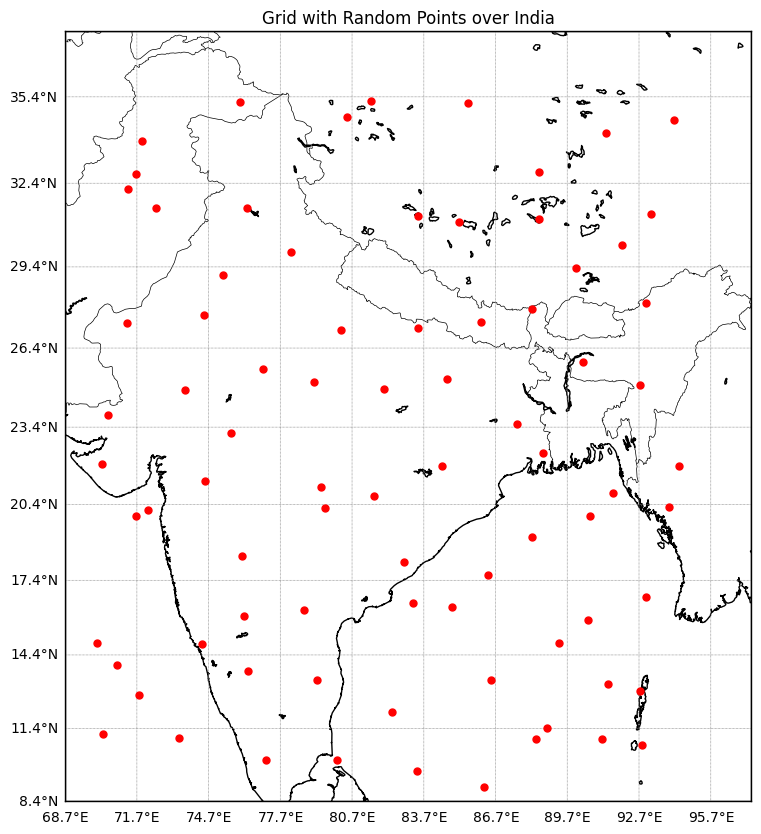

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random

# Define the boundaries of India
min_lat, max_lat = 8.4, 37.6
min_lon, max_lon = 68.7, 97.4

# Define the size of each grid cell
grid_size = 3.0  # 1° x 1°

# Create a map centered around India
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=min_lat, urcrnrlat=max_lat,
            llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='i', ax=ax)

# Draw map boundaries and coastlines
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()

# Calculate the number of grids
lat_grids = int((max_lat - min_lat) / grid_size)
lon_grids = int((max_lon - min_lon) / grid_size)

# Draw the grid
parallels = [min_lat + i * grid_size for i in range(lat_grids + 1)]
meridians = [min_lon + j * grid_size for j in range(lon_grids + 1)]

m.drawparallels(parallels, labels=[1,0,0,0], color='grey', dashes=[1, 1], linewidth=0.5)
m.drawmeridians(meridians, labels=[0,0,0,1], color='grey', dashes=[1, 1], linewidth=0.5)

# Generate random points within each grid
random_points = []
for i in range(lat_grids):
    for j in range(lon_grids):
        grid_min_lat = min_lat + i * grid_size
        grid_max_lat = grid_min_lat + grid_size
        grid_min_lon = min_lon + j * grid_size
        grid_max_lon = grid_min_lon + grid_size

        rand_lat = random.uniform(grid_min_lat, grid_max_lat)
        rand_lon = random.uniform(grid_min_lon, grid_max_lon)
        random_points.append((rand_lat, rand_lon))

# Plot random points on the map
for point in random_points:
    x, y = m(point[1], point[0])
    m.plot(x, y, 'ro', markersize=5)

plt.title('Grid with Random Points over India')
plt.show()


Shapefile Fields: [('DeletionFlag', 'C', 1, 0), ['featurecla', 'C', 15, 0], ['scalerank', 'N', 1, 0], ['LABELRANK', 'N', 2, 0], ['SOVEREIGNT', 'C', 32, 0], ['SOV_A3', 'C', 3, 0], ['ADM0_DIF', 'N', 1, 0], ['LEVEL', 'N', 1, 0], ['TYPE', 'C', 17, 0], ['TLC', 'C', 1, 0], ['ADMIN', 'C', 36, 0], ['ADM0_A3', 'C', 3, 0], ['GEOU_DIF', 'N', 1, 0], ['GEOUNIT', 'C', 36, 0], ['GU_A3', 'C', 3, 0], ['SU_DIF', 'N', 1, 0], ['SUBUNIT', 'C', 36, 0], ['SU_A3', 'C', 3, 0], ['BRK_DIFF', 'N', 1, 0], ['NAME', 'C', 29, 0], ['NAME_LONG', 'C', 36, 0], ['BRK_A3', 'C', 3, 0], ['BRK_NAME', 'C', 32, 0], ['BRK_GROUP', 'C', 17, 0], ['ABBREV', 'C', 16, 0], ['POSTAL', 'C', 4, 0], ['FORMAL_EN', 'C', 52, 0], ['FORMAL_FR', 'C', 35, 0], ['NAME_CIAWF', 'C', 45, 0], ['NOTE_ADM0', 'C', 16, 0], ['NOTE_BRK', 'C', 63, 0], ['NAME_SORT', 'C', 36, 0], ['NAME_ALT', 'C', 19, 0], ['MAPCOLOR7', 'N', 1, 0], ['MAPCOLOR8', 'N', 1, 0], ['MAPCOLOR9', 'N', 1, 0], ['MAPCOLOR13', 'N', 3, 0], ['POP_EST', 'N', 12, 1], ['POP_RANK', 'N', 2, 0], ['P

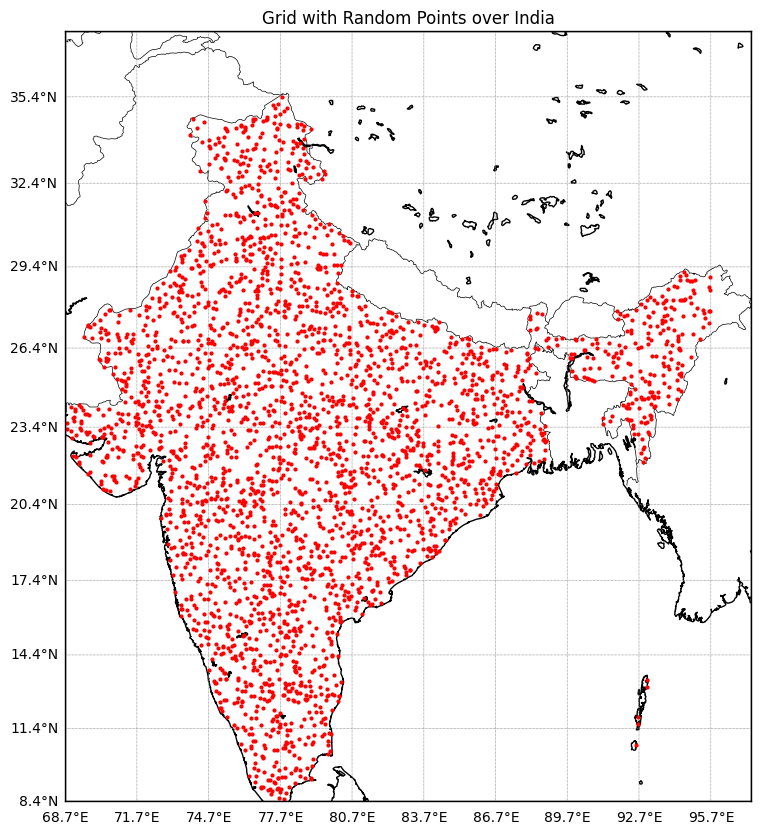

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random
import shapefile
from shapely.geometry import Point, shape

# Define the boundaries of India
min_lat, max_lat = 8.4, 37.6
min_lon, max_lon = 68.7, 97.4

# Load the shapefile for India's boundaries
sf = shapefile.Reader("/content/ne_10m_admin_0_countries.shp")

# Print fields to find the correct field for country names
print("Shapefile Fields:", sf.fields)

# Identify the field containing country names
# Based on typical shapefiles, the country name field is often 'NAME' or 'COUNTRY'
country_name_field = None
for field in sf.fields:
    if 'name' in field[0].lower():
        country_name_field = field[0]
        break

if country_name_field is None:
    raise ValueError("Field containing country names not found in the shapefile.")

# Extract the shape of India
india_shape = None
for shape_rec in sf.shapeRecords():
    if shape_rec.record[country_name_field] == 'India':
        india_shape = shape_rec.shape
        break

if india_shape is None:
    raise ValueError("India's shape not found in the shapefile.")

def point_in_india(lat, lon):
    """Check if a given point is inside India using the shapefile."""
    point = Point(lon, lat)
    india_polygon = shape(india_shape.__geo_interface__)
    return india_polygon.contains(point)

# Define the size of each grid cell
grid_size = 3.0  # 3° x 3°

# Create a map centered around India
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=min_lat, urcrnrlat=max_lat,
            llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='i', ax=ax)

# Draw map boundaries and coastlines
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()

# Calculate the number of grids
lat_grids = int((max_lat - min_lat) / grid_size)
lon_grids = int((max_lon - min_lon) / grid_size)

# Draw the grid
parallels = [min_lat + i * grid_size for i in range(lat_grids + 1)]
meridians = [min_lon + j * grid_size for j in range(lon_grids + 1)]

m.drawparallels(parallels, labels=[1,0,0,0], color='grey', dashes=[1, 1], linewidth=0.5)
m.drawmeridians(meridians, labels=[0,0,0,1], color='grey', dashes=[1, 1], linewidth=0.5)

# Generate random points within each grid
random_points = []
for i in range(lat_grids):
    for j in range(lon_grids):
        grid_min_lat = min_lat + i * grid_size
        grid_max_lat = grid_min_lat + grid_size
        grid_min_lon = min_lon + j * grid_size
        grid_max_lon = grid_min_lon + grid_size

        # Determine the number of points to generate
        points_to_generate = 50

        # Check grid corners to determine if the grid cell overlaps with the boundary
        corners = [(grid_min_lat, grid_min_lon), (grid_min_lat, grid_max_lon),
                   (grid_max_lat, grid_min_lon), (grid_max_lat, grid_max_lon)]
        if any(point_in_india(lat, lon) for lat, lon in corners):
            points_to_generate = 100

        # Generate random points within the current grid cell
        points_in_grid = []
        for _ in range(points_to_generate):
            rand_lat = random.uniform(grid_min_lat, grid_max_lat)
            rand_lon = random.uniform(grid_min_lon, grid_max_lon)
            if point_in_india(rand_lat, rand_lon):
                points_in_grid.append((rand_lat, rand_lon))

        random_points.extend(points_in_grid)

# Plot random points on the map
for point in random_points:
    x, y = m(point[1], point[0])
    m.plot(x, y, 'ro', markersize=2)  # Adjust marker size if needed

plt.title('Grid with Random Points over India')
plt.show()


Shapefile Fields: [('DeletionFlag', 'C', 1, 0), ['featurecla', 'C', 15, 0], ['scalerank', 'N', 1, 0], ['LABELRANK', 'N', 2, 0], ['SOVEREIGNT', 'C', 32, 0], ['SOV_A3', 'C', 3, 0], ['ADM0_DIF', 'N', 1, 0], ['LEVEL', 'N', 1, 0], ['TYPE', 'C', 17, 0], ['TLC', 'C', 1, 0], ['ADMIN', 'C', 36, 0], ['ADM0_A3', 'C', 3, 0], ['GEOU_DIF', 'N', 1, 0], ['GEOUNIT', 'C', 36, 0], ['GU_A3', 'C', 3, 0], ['SU_DIF', 'N', 1, 0], ['SUBUNIT', 'C', 36, 0], ['SU_A3', 'C', 3, 0], ['BRK_DIFF', 'N', 1, 0], ['NAME', 'C', 29, 0], ['NAME_LONG', 'C', 36, 0], ['BRK_A3', 'C', 3, 0], ['BRK_NAME', 'C', 32, 0], ['BRK_GROUP', 'C', 17, 0], ['ABBREV', 'C', 16, 0], ['POSTAL', 'C', 4, 0], ['FORMAL_EN', 'C', 52, 0], ['FORMAL_FR', 'C', 35, 0], ['NAME_CIAWF', 'C', 45, 0], ['NOTE_ADM0', 'C', 16, 0], ['NOTE_BRK', 'C', 63, 0], ['NAME_SORT', 'C', 36, 0], ['NAME_ALT', 'C', 19, 0], ['MAPCOLOR7', 'N', 1, 0], ['MAPCOLOR8', 'N', 1, 0], ['MAPCOLOR9', 'N', 1, 0], ['MAPCOLOR13', 'N', 3, 0], ['POP_EST', 'N', 12, 1], ['POP_RANK', 'N', 2, 0], ['P

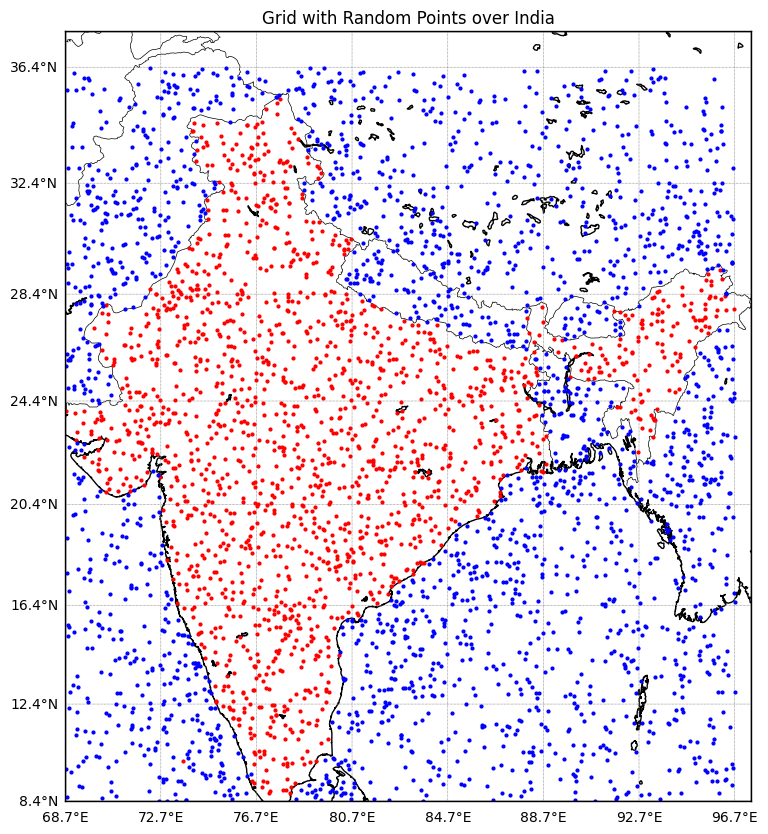

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random
import shapefile
from shapely.geometry import Point, shape

# Define the boundaries of India
min_lat, max_lat = 8.4, 37.6
min_lon, max_lon = 68.7, 97.4

# Load the shapefile for India's boundaries
sf = shapefile.Reader("/content/ne_10m_admin_0_countries.shp")

# Print fields to find the correct field for country names
print("Shapefile Fields:", sf.fields)

# Identify the field containing country names
# Based on typical shapefiles, the country name field is often 'NAME' or 'COUNTRY'
country_name_field = None
for field in sf.fields:
    if 'name' in field[0].lower():
        country_name_field = field[0]
        break

if country_name_field is None:
    raise ValueError("Field containing country names not found in the shapefile.")

# Extract the shape of India
india_shape = None
for shape_rec in sf.shapeRecords():
    if shape_rec.record[country_name_field] == 'India':
        india_shape = shape_rec.shape
        break

if india_shape is None:
    raise ValueError("India's shape not found in the shapefile.")

def point_in_india(lat, lon):
    """Check if a given point is inside India using the shapefile."""
    point = Point(lon, lat)
    india_polygon = shape(india_shape.__geo_interface__)
    return india_polygon.contains(point)

# Define the size of each grid cell
grid_size = 4.0  # 3° x 3°

# Create a map centered around India
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=min_lat, urcrnrlat=max_lat,
            llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='i', ax=ax)

# Draw map boundaries and coastlines
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()

# Calculate the number of grids
lat_grids = int((max_lat - min_lat) / grid_size)
lon_grids = int((max_lon - min_lon) / grid_size)

# Draw the grid
parallels = [min_lat + i * grid_size for i in range(lat_grids + 1)]
meridians = [min_lon + j * grid_size for j in range(lon_grids + 1)]

m.drawparallels(parallels, labels=[1,0,0,0], color='grey', dashes=[1, 1], linewidth=0.5)
m.drawmeridians(meridians, labels=[0,0,0,1], color='grey', dashes=[1, 1], linewidth=0.5)

# Generate random points within each grid
random_points_inside = []
random_points_outside = []

for i in range(lat_grids):
    for j in range(lon_grids):
        grid_min_lat = min_lat + i * grid_size
        grid_max_lat = grid_min_lat + grid_size
        grid_min_lon = min_lon + j * grid_size
        grid_max_lon = grid_min_lon + grid_size

        # Determine the number of points to generate
        points_to_generate = 50

        # Check grid corners to determine if the grid cell overlaps with the boundary
        corners = [(grid_min_lat, grid_min_lon), (grid_min_lat, grid_max_lon),
                   (grid_max_lat, grid_min_lon), (grid_max_lat, grid_max_lon)]
        if any(point_in_india(lat, lon) for lat, lon in corners):
            points_to_generate = 100

        # Generate random points within the current grid cell
        for _ in range(points_to_generate):
            rand_lat = random.uniform(grid_min_lat, grid_max_lat)
            rand_lon = random.uniform(grid_min_lon, grid_max_lon)
            if point_in_india(rand_lat, rand_lon):
                random_points_inside.append((rand_lat, rand_lon))
            else:
                random_points_outside.append((rand_lat, rand_lon))

# Plot random points inside India on the map (in red)
for point in random_points_inside:
    x, y = m(point[1], point[0])
    m.plot(x, y, 'ro', markersize=2)  # Red color

# Plot random points outside India on the map (in blue)
for point in random_points_outside:
    x, y = m(point[1], point[0])
    m.plot(x, y, 'bo', markersize=2)  # Blue color

plt.title('Grid with Random Points over India')
plt.show()


Shapefile Fields: [('DeletionFlag', 'C', 1, 0), ['featurecla', 'C', 15, 0], ['scalerank', 'N', 1, 0], ['LABELRANK', 'N', 2, 0], ['SOVEREIGNT', 'C', 32, 0], ['SOV_A3', 'C', 3, 0], ['ADM0_DIF', 'N', 1, 0], ['LEVEL', 'N', 1, 0], ['TYPE', 'C', 17, 0], ['TLC', 'C', 1, 0], ['ADMIN', 'C', 36, 0], ['ADM0_A3', 'C', 3, 0], ['GEOU_DIF', 'N', 1, 0], ['GEOUNIT', 'C', 36, 0], ['GU_A3', 'C', 3, 0], ['SU_DIF', 'N', 1, 0], ['SUBUNIT', 'C', 36, 0], ['SU_A3', 'C', 3, 0], ['BRK_DIFF', 'N', 1, 0], ['NAME', 'C', 29, 0], ['NAME_LONG', 'C', 36, 0], ['BRK_A3', 'C', 3, 0], ['BRK_NAME', 'C', 32, 0], ['BRK_GROUP', 'C', 17, 0], ['ABBREV', 'C', 16, 0], ['POSTAL', 'C', 4, 0], ['FORMAL_EN', 'C', 52, 0], ['FORMAL_FR', 'C', 35, 0], ['NAME_CIAWF', 'C', 45, 0], ['NOTE_ADM0', 'C', 16, 0], ['NOTE_BRK', 'C', 63, 0], ['NAME_SORT', 'C', 36, 0], ['NAME_ALT', 'C', 19, 0], ['MAPCOLOR7', 'N', 1, 0], ['MAPCOLOR8', 'N', 1, 0], ['MAPCOLOR9', 'N', 1, 0], ['MAPCOLOR13', 'N', 3, 0], ['POP_EST', 'N', 12, 1], ['POP_RANK', 'N', 2, 0], ['P

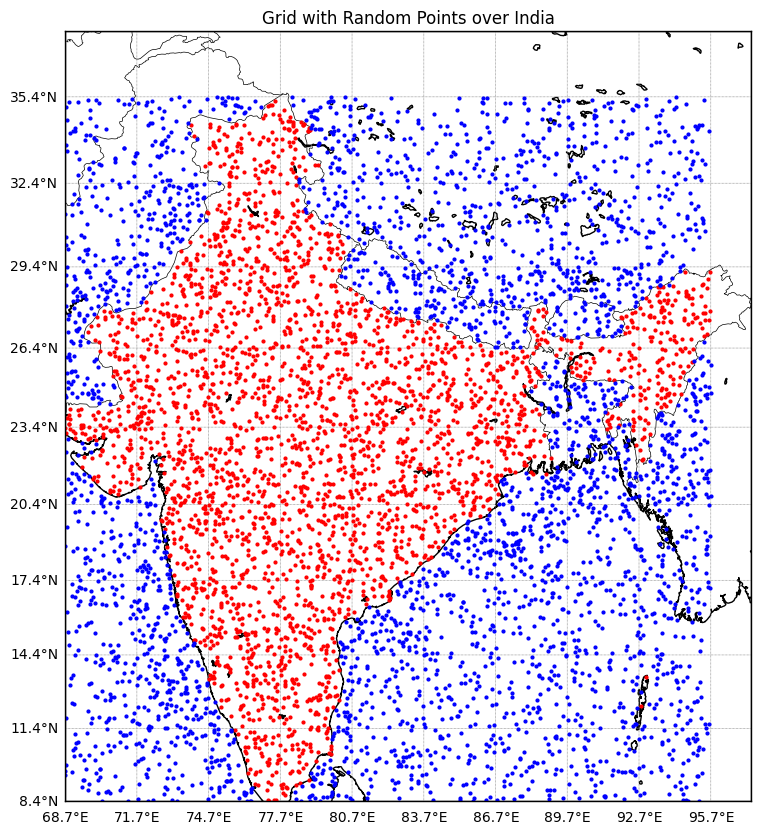

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random
import shapefile
from shapely.geometry import Point, shape

# Define the boundaries of India
min_lat, max_lat = 8.4, 37.6
min_lon, max_lon = 68.7, 97.4

# Load the shapefile for India's boundaries
sf = shapefile.Reader("/content/ne_10m_admin_0_countries.shp")

# Print fields to find the correct field for country names
print("Shapefile Fields:", sf.fields)

# Identify the field containing country names
# Based on typical shapefiles, the country name field is often 'NAME' or 'COUNTRY'
country_name_field = None
for field in sf.fields:
    if 'name' in field[0].lower():
        country_name_field = field[0]
        break

if country_name_field is None:
    raise ValueError("Field containing country names not found in the shapefile.")

# Extract the shape of India
india_shape = None
for shape_rec in sf.shapeRecords():
    if shape_rec.record[country_name_field] == 'India':
        india_shape = shape_rec.shape
        break

if india_shape is None:
    raise ValueError("India's shape not found in the shapefile.")

def point_in_india(lat, lon):
    """Check if a given point is inside India using the shapefile."""
    point = Point(lon, lat)
    india_polygon = shape(india_shape.__geo_interface__)
    return india_polygon.contains(point)

# Define the size of each grid cell
grid_size = 3.0  # 3° x 3°

# Create a map centered around India
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=min_lat, urcrnrlat=max_lat,
            llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='i', ax=ax)

# Draw map boundaries and coastlines
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()

# Calculate the number of grids
lat_grids = int((max_lat - min_lat) / grid_size)
lon_grids = int((max_lon - min_lon) / grid_size)

# Draw the grid
parallels = [min_lat + i * grid_size for i in range(lat_grids + 1)]
meridians = [min_lon + j * grid_size for j in range(lon_grids + 1)]

m.drawparallels(parallels, labels=[1,0,0,0], color='grey', dashes=[1, 1], linewidth=0.5)
m.drawmeridians(meridians, labels=[0,0,0,1], color='grey', dashes=[1, 1], linewidth=0.5)

# Generate random points within each grid
random_points_inside = []
random_points_outside = []

for i in range(lat_grids):
    for j in range(lon_grids):
        grid_min_lat = min_lat + i * grid_size
        grid_max_lat = grid_min_lat + grid_size
        grid_min_lon = min_lon + j * grid_size
        grid_max_lon = grid_min_lon + grid_size

        # Determine the number of points to generate
        points_to_generate = 50

        # Check grid corners to determine if the grid cell overlaps with the boundary
        corners = [(grid_min_lat, grid_min_lon), (grid_min_lat, grid_max_lon),
                   (grid_max_lat, grid_min_lon), (grid_max_lat, grid_max_lon)]
        if any(point_in_india(lat, lon) for lat, lon in corners):
            points_to_generate = 100

        # Generate random points within the current grid cell
        for _ in range(points_to_generate):
            rand_lat = random.uniform(grid_min_lat, grid_max_lat)
            rand_lon = random.uniform(grid_min_lon, grid_max_lon)
            if point_in_india(rand_lat, rand_lon):
                random_points_inside.append((rand_lat, rand_lon))
            else:
                random_points_outside.append((rand_lat, rand_lon))

# Plot random points inside India on the map (in red)
for point in random_points_inside:
    x, y = m(point[1], point[0])
    m.plot(x, y, 'ro', markersize=2)  # Red color

# Plot random points outside India on the map (in blue)
for point in random_points_outside:
    x, y = m(point[1], point[0])
    m.plot(x, y, 'bo', markersize=2)  # Blue color

plt.title('Grid with Random Points over India')
plt.show()


In [2]:
!pip install matplotlib basemap pyshp
!pip install cartopy shapely geopandas



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.3 MB/s eta 0:00:00


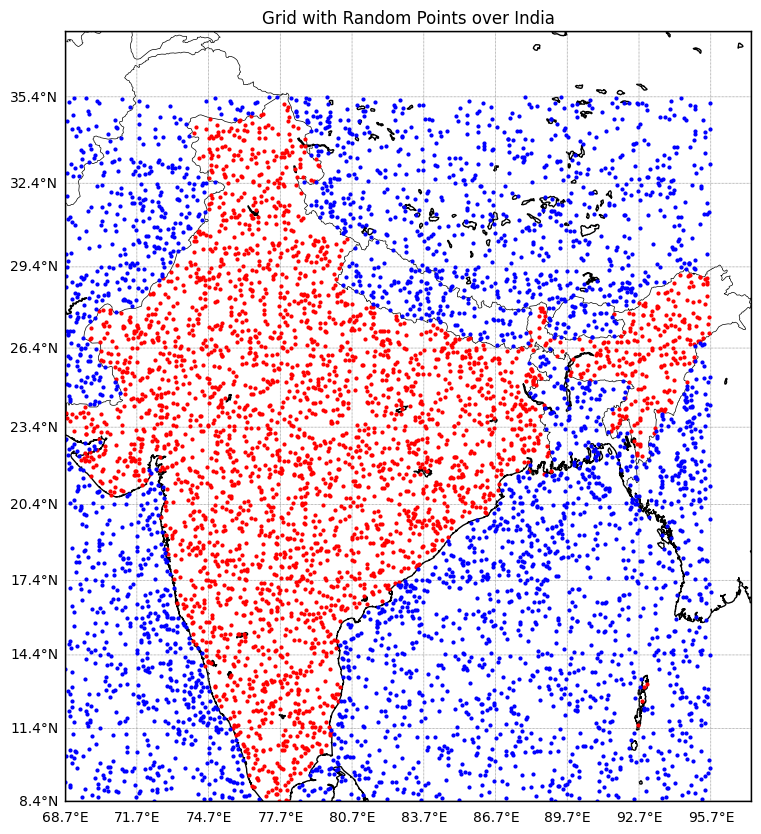

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random
import shapefile
from shapely.geometry import Point, shape
import csv

# Define the boundaries of India
min_lat, max_lat = 8.4, 37.6
min_lon, max_lon = 68.7, 97.4

# Load the shapefile for India's boundaries
sf = shapefile.Reader("/content/ne_10m_admin_0_countries.shp")

# Identify the field containing country names
country_name_field = None
for field in sf.fields:
    if 'name' in field[0].lower():
        country_name_field = field[0]
        break

if country_name_field is None:
    raise ValueError("Field containing country names not found in the shapefile.")

# Extract the shape of India
india_shape = None
for shape_rec in sf.shapeRecords():
    if shape_rec.record[country_name_field] == 'India':
        india_shape = shape_rec.shape
        break

if india_shape is None:
    raise ValueError("India's shape not found in the shapefile.")

def point_in_india(lat, lon):
    """Check if a given point is inside India using the shapefile."""
    point = Point(lon, lat)
    india_polygon = shape(india_shape.__geo_interface__)
    return india_polygon.contains(point)

# Define the size of each grid cell
grid_size = 3.0  # 3° x 3°

# Create a map centered around India
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=min_lat, urcrnrlat=max_lat,
            llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='i', ax=ax)

# Draw map boundaries and coastlines
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()

# Calculate the number of grids
lat_grids = int((max_lat - min_lat) / grid_size)
lon_grids = int((max_lon - min_lon) / grid_size)

# Draw the grid
parallels = [min_lat + i * grid_size for i in range(lat_grids + 1)]
meridians = [min_lon + j * grid_size for j in range(lon_grids + 1)]

m.drawparallels(parallels, labels=[1,0,0,0], color='grey', dashes=[1, 1], linewidth=0.5)
m.drawmeridians(meridians, labels=[0,0,0,1], color='grey', dashes=[1, 1], linewidth=0.5)

# Generate random points within each grid
random_points_inside = []
random_points_outside = []

for i in range(lat_grids):
    for j in range(lon_grids):
        grid_min_lat = min_lat + i * grid_size
        grid_max_lat = grid_min_lat + grid_size
        grid_min_lon = min_lon + j * grid_size
        grid_max_lon = grid_min_lon + grid_size

        # Determine the number of points to generate
        points_to_generate = 50

        # Check grid corners to determine if the grid cell overlaps with the boundary
        corners = [(grid_min_lat, grid_min_lon), (grid_min_lat, grid_max_lon),
                   (grid_max_lat, grid_min_lon), (grid_max_lat, grid_max_lon)]
        if any(point_in_india(lat, lon) for lat, lon in corners):
            points_to_generate = 100

        # Generate random points within the current grid cell
        for _ in range(points_to_generate):
            rand_lat = random.uniform(grid_min_lat, grid_max_lat)
            rand_lon = random.uniform(grid_min_lon, grid_max_lon)
            if point_in_india(rand_lat, rand_lon):
                random_points_inside.append((rand_lat, rand_lon))
            else:
                random_points_outside.append((rand_lat, rand_lon))

# Save random points inside India to a CSV file
with open('random_points_inside_india.csv', 'w', newline='') as csvfile:
    fieldnames = ['Latitude', 'Longitude', 'Direction']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    # Reference point for direction calculation (center of India)
    ref_lat, ref_lon = (20.5937, 78.9629)

    for lat, lon in random_points_inside:
        # Calculate direction (N, S, E, W)
        if lat > ref_lat and lon > ref_lon:
            direction = 'NE'
        elif lat > ref_lat and lon < ref_lon:
            direction = 'NW'
        elif lat < ref_lat and lon > ref_lon:
            direction = 'SE'
        else:
            direction = 'SW'

        writer.writerow({'Latitude': lat, 'Longitude': lon, 'Direction': direction})

# Plot random points inside India on the map (in red)
for point in random_points_inside:
    x, y = m(point[1], point[0])
    m.plot(x, y, 'ro', markersize=2)  # Red color

# Plot random points outside India on the map (in blue)
for point in random_points_outside:
    x, y = m(point[1], point[0])
    m.plot(x, y, 'bo', markersize=2)  # Blue color

plt.title('Grid with Random Points over India')
plt.show()
